In [1]:
from utils.tushare_utils  import pro,ts
df = pro.stock_basic(
                exchange='',
                list_status='L',
                fields='ts_code,name'
            )
name = df[df['ts_code']=='000002.SZ']['name'][1]
print(ts.realtime_quote(ts_code='600000.SH', src='dc'))

没有找到 trade_date 为 20250829 的记录
   NAME    TS_CODE      DATE       TIME   OPEN  PRE_CLOSE  PRICE   HIGH  \
0  浦发银行  600000.SH  20250829   16:11:42  13.81      13.86  13.63  13.99   

     LOW    BID  ...  A1_V   A1_P    A2_V   A2_P  A3_V  A3_P    A4_V   A4_P  \
0  13.63  13.63  ...  30.0  13.68  2387.0  13.69  72.0  13.7  2469.0  13.71   

   A5_V   A5_P  
0  50.0  13.72  

[1 rows x 33 columns]


原始数据列名: ['candle_end_time', 'open', 'high', 'low', 'close', 'amount']
      candle_end_time    open    high     low   close    amount
0 2025-08-28 10:55:00  109.02  109.03  108.82  108.82  11869.00
1 2025-08-28 11:00:00  108.81  108.94  108.65  108.72  14654.00
2 2025-08-28 11:05:00  108.72  108.72  108.58  108.59  10421.00
3 2025-08-28 11:10:00  108.59  108.76  108.50  108.72  11746.71
4 2025-08-28 11:15:00  108.73  108.73  108.60  108.67   7385.00
使用 'amount' (成交额) 列作为成交量进行绘图。
处理后的数据列名: ['Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20']
                       Open    High     Low   Close   Volume      MA5      MA20
candle_end_time                                                                
2025-09-05 14:40:00  106.60  106.88  106.55  106.87  18646.0  106.392  105.4090
2025-09-05 14:45:00  106.90  107.29  106.89  107.23  34927.0  106.654  105.5320
2025-09-05 14:50:00  107.23  107.48  107.21  107.38  28974.0  106.900  105.6660
2025-09-05 14:55:00  107.36  107.36  106.99  107

D:\Program Files\conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Program Files\conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Program Files\conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Program Files\conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38047 (\N{CJK UNIFIED IDEOGRAPH-949F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Program Files\conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  fig.c

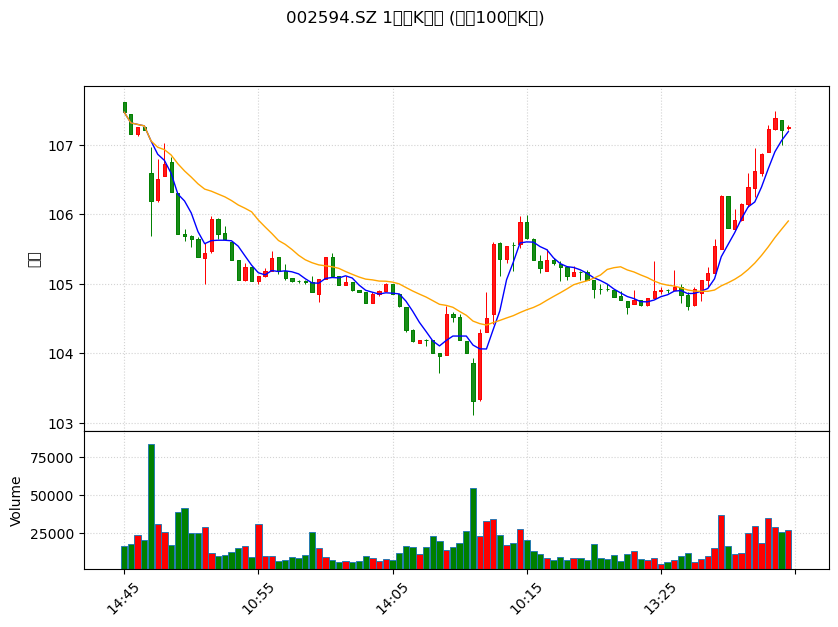

In [10]:
from utils.tushare_utils import IndexAnalysis
import mplfinance as mpf
import pandas as pd
import numpy as np

# 获取股票 002594.SZ 的 1分钟频率数据
df = IndexAnalysis.rt_min('002594.SZ', 5)
print("原始数据列名:", df.columns.tolist())
print(df.head())

# 数据预处理
# 1. 确保时间列是datetime类型，并设置为索引
df['candle_end_time'] = pd.to_datetime(df['candle_end_time'])

# 2. 控制显示的K线数量
k_bars_to_show = 100  # 控制显示的K线数量
df = df.iloc[-k_bars_to_show:] if len(df) > k_bars_to_show else df
df.set_index('candle_end_time', inplace=True)

# 3. 检查并处理列名以符合mplfinance要求
if 'volume' in df.columns:
    df.rename(columns={'volume': 'Volume'}, inplace=True)
elif 'amount' in df.columns:
    print("使用 'amount' (成交额) 列作为成交量进行绘图。")
    df.rename(columns={'amount': 'Volume'}, inplace=True)
else:
    print("数据中未找到 'volume' 或 'amount' 列，将不绘制成交量。")

# 重命名价格列
df.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close'
}, inplace=True)

# 4. 计算移动平均线
# 计算5周期和20周期移动平均线
df['MA5'] = df['Close'].rolling(window=5, min_periods=1).mean()
df['MA20'] = df['Close'].rolling(window=20, min_periods=1).mean()

print("处理后的数据列名:", df.columns.tolist())
print(df.tail())

# 5. 创建移动平均线的附加图
apds = [
    mpf.make_addplot(df['MA5'], color='blue', width=1.0),
    mpf.make_addplot(df['MA20'], color='orange', width=1.0)
]

# 6. 绘制K线图
# 判断是否有成交量数据
has_volume = 'Volume' in df.columns

# 创建自定义样式
style = mpf.make_mpf_style(
    marketcolors=mpf.make_marketcolors(
        up='red',
        down='green',
        edge='inherit',
        wick='inherit',
        volume='in'
    ),
    gridstyle=':',
    gridcolor='lightgray',
    facecolor='white'
)

# 绘制图表
mpf.plot(
    df,
    type='candle',
    style=style,
    title=f'002594.SZ 1分钟K线图 (最近{len(df)}根K线)',
    ylabel='价格',
    volume=has_volume,
    addplot=apds,
    figratio=(12, 8),
    figscale=1.2,
    datetime_format='%H:%M',
    xrotation=45,
    show_nontrading=False
)

In [18]:
from utils.tushare_utils import IndexAnalysis


import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
def calculate_rsi_tonghuashun(data, period=14):
    """
    计算与同花顺匹配的RSI值（使用Wilder平滑方法）
    
    参数:
    data: DataFrame, 包含价格数据，必须有'close'列
    period: int, RSI计算周期（6或12）
    
    返回:
    float: 最新一条数据的RSI值
    """
    # 确保有足够的数据点
    if len(data) < period + 1:
        return None
    
    # 复制数据以避免修改原始DataFrame
    df = data.copy()
    
    # 计算价格变化
    delta = df['close'].diff()
    
    # 分离上涨和下跌
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    # 计算初始平均值（前period个周期的简单平均）
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    
    # 使用Wilder平滑方法计算后续平均值
    for i in range(period, len(df)):
        avg_gain.iloc[i] = (avg_gain.iloc[i-1] * (period - 1) + gain.iloc[i]) / period
        avg_loss.iloc[i] = (avg_loss.iloc[i-1] * (period - 1) + loss.iloc[i]) / period
    
    # 计算相对强度(RS)
    rs = avg_gain / avg_loss
    
    # 计算RSI
    rsi = 100 - (100 / (1 + rs))
    
    return rsi.iloc[-1]  # 返回最新值

def get_tonghuashun_rsi_values(data):
    """
    计算同花顺风格的RSI6和RSI12值
    
    参数:
    data: DataFrame, 包含价格数据，必须有'close'列
    
    返回:
    dict: 包含RSI6和RSI12值的字典
    """
    # 计算RSI6
    rsi6 = calculate_rsi_tonghuashun(data, period=6)
    
    # 计算RSI12
    rsi12 = calculate_rsi_tonghuashun(data, period=12)
    
    return {
        "RSI6": round(rsi6, 2) if rsi6 is not None else None,
        "RSI12": round(rsi12, 2) if rsi12 is not None else None
    }
print(get_tonghuashun_rsi_values(IndexAnalysis.rt_min('399006.SZ',30)))

{'RSI6': 23.9, 'RSI12': 32.48}


In [13]:
import uuid

# 生成一个基于主机ID、序列号和当前时间的UUID，具有唯一性
random_uuid = uuid.uuid1()
random_string = str(random_uuid).replace('-', '')  # 去掉连字符，得到32位字符串
print(random_string[:4])

# 或者使用uuid4（基于随机数）
random_uuid4 = uuid.uuid4()
random_string4 = str(random_uuid4).replace('-', '')
print(random_string4)

6c5d
cf49c989f70c4020a0a1bab86926368b
